In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [2]:
from keras import Sequential
from keras.layers import Dense, SimpleRNN

In [3]:
model = Sequential()

model.add(SimpleRNN(3, input_shape = (4,5)))
model.add(Dense(1, activation = 'sigmoid'))

model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 3)              │            27 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31 (124.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

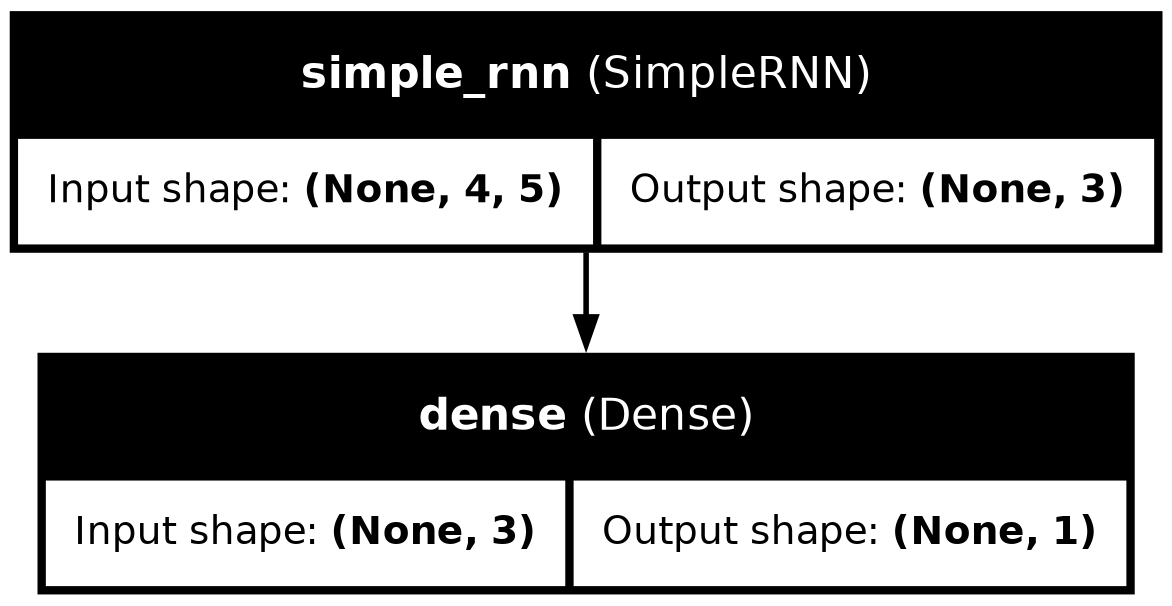

In [4]:
from keras.utils import plot_model
plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)

In [5]:
print(model.get_weights()[0].shape)
model.get_weights()[0]

(5, 3)


array([[-0.6348113 , -0.69818044, -0.364747  ],
       [ 0.00982022, -0.29789215, -0.5019692 ],
       [-0.15757817, -0.8499811 , -0.3623882 ],
       [-0.132254  , -0.710409  , -0.05692536],
       [-0.27849162,  0.8003896 ,  0.6249079 ]], dtype=float32)

In [6]:
print("Weights in Feedback loop corresponding layer 1")
print(model.get_weights()[1].shape)
model.get_weights()[1]

Weights in Feedback loop corresponding layer 1
(3, 3)


array([[-0.42326772,  0.7267267 , -0.541029  ],
       [ 0.551472  , -0.26713657, -0.79026365],
       [ 0.71883446,  0.63285553,  0.28769922]], dtype=float32)

In [7]:
print("Bias of 1st layer: ")
print(model.get_weights()[2].shape)
model.get_weights()[2]

Bias of 1st layer: 
(3,)


array([0., 0., 0.], dtype=float32)

In [8]:
print("Weights of 2nd layer")
print(model.get_weights()[3].shape)
model.get_weights()[3]

Weights of 2nd layer
(3, 1)


array([[-0.75425243],
       [ 0.89415705],
       [ 0.5919943 ]], dtype=float32)

In [9]:
print("Bias of output layer: ")
print(model.get_weights()[4].shape)
model.get_weights()[4]

Bias of output layer: 
(1,)


array([0.], dtype=float32)